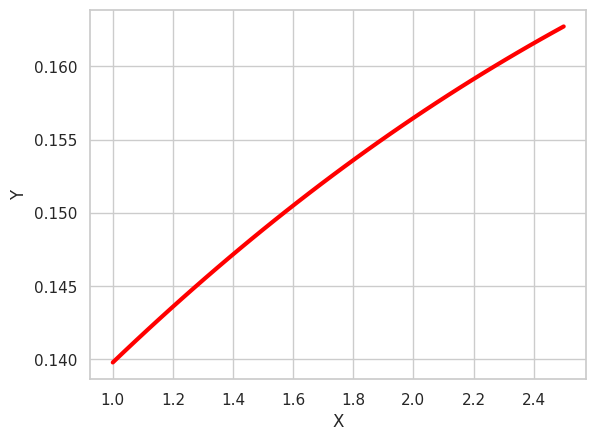

Epoch 1/100, Loss: 0.0000
Epoch 2/100, Loss: 0.0000
Epoch 3/100, Loss: 0.0000
Epoch 4/100, Loss: 0.0000
Epoch 5/100, Loss: 0.0000
Epoch 6/100, Loss: 0.0000
Epoch 7/100, Loss: 0.0000
Epoch 8/100, Loss: 0.0000
Epoch 9/100, Loss: 0.0000
Epoch 10/100, Loss: 0.0000
Epoch 11/100, Loss: 0.0000
Epoch 12/100, Loss: 0.0000
Epoch 13/100, Loss: 0.0000
Epoch 14/100, Loss: 0.0000
Epoch 15/100, Loss: 0.0000
Epoch 16/100, Loss: 0.0000
Epoch 17/100, Loss: 0.0000
Epoch 18/100, Loss: 0.0000
Epoch 19/100, Loss: 0.0000
Epoch 20/100, Loss: 0.0000
Epoch 21/100, Loss: 0.0000
Epoch 22/100, Loss: 0.0000
Epoch 23/100, Loss: 0.0000
Epoch 24/100, Loss: 0.0000
Epoch 25/100, Loss: 0.0000
Epoch 26/100, Loss: 0.0000
Epoch 27/100, Loss: 0.0000
Epoch 28/100, Loss: 0.0000
Epoch 29/100, Loss: 0.0000
Epoch 30/100, Loss: 0.0000
Epoch 31/100, Loss: 0.0000
Epoch 32/100, Loss: 0.0000
Epoch 33/100, Loss: 0.0000
Epoch 34/100, Loss: 0.0000
Epoch 35/100, Loss: 0.0000
Epoch 36/100, Loss: 0.0000
Epoch 37/100, Loss: 0.0000
Epoch 38/1

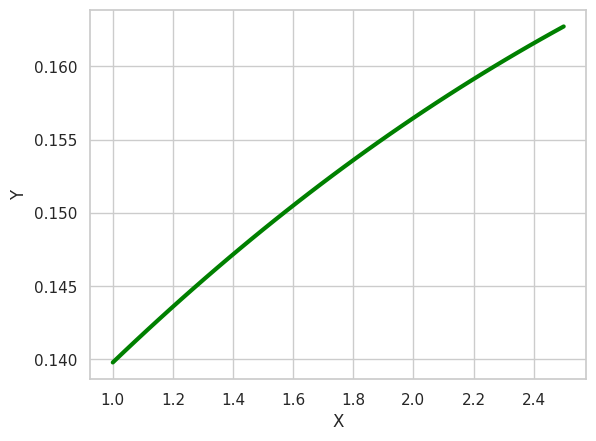

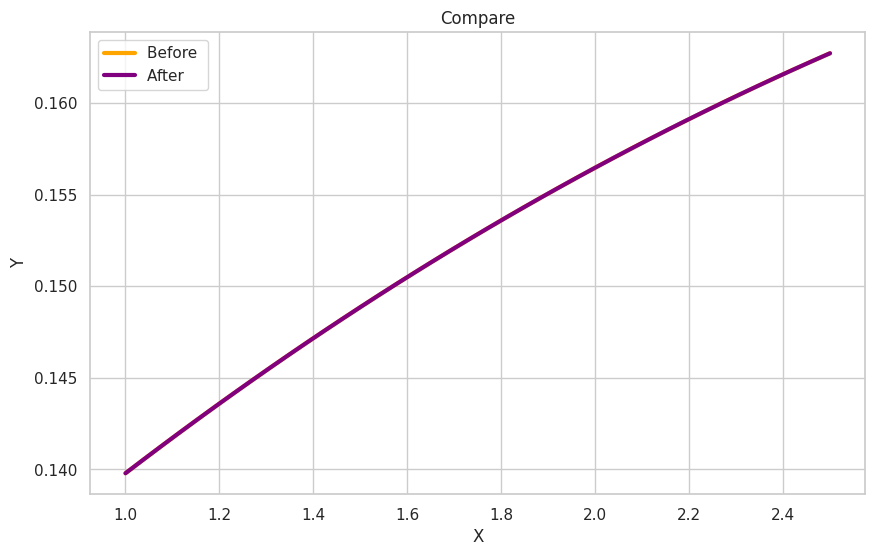

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt
import seaborn as sns
class habiba(nn.Module):
    def __init__(self):
        super().__init__()
        #  weights
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11
        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12
        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13
        output = layer_01_output + layer_02_output + layer_03_output
        output = torch.tanh(output)
        output = output * self.w20
        return output
model = habiba()
X = torch.linspace(start=1, end=2.5, steps=40)
initialpre = model(X).detach()


sns.set(style="whitegrid")
sns.lineplot(x=X, y=initialpre, color='red', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()




optimizer = SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

Y_true = initialpre

epochs = 100
for epoch in range(epochs):
    Y_pred = model(X)

    loss_value = loss_fn(Y_pred, Y_true)


    optimizer.zero_grad()
    loss_value.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{epochs}, Loss: {loss_value.item():.4f}')

predictions_after = model(X).detach()

sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=predictions_after,
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')



plt.figure(figsize=(10, 6))
sns.lineplot(x=X.cpu(), y= initialpre , color='orange', label="Before ", linewidth=3)
sns.lineplot(x=X.cpu(), y=predictions_after, color='purple', label="After ", linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title("Compare")
plt.legend()
plt.show()
